Osnabrück University - Machine Learning (Summer Term 2020) - Prof. Dr.-Ing. G. Heidemann, Axel Schaffland, Ulf Krumnack

# Exercise Sheet 04: Clustering

## Introduction

This week's sheet should be solved and handed in before the end of **Saturday, May 23, 2020**. If you need help (and Google and other resources were not enough), feel free to contact your groups designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

In the following tasks we will be relying on numpy. Using the following import we expect it to be in global scope as `np`. Therefore we can, after executing the following cell, use stuff like `np.array` and `np.sqrt`. Check out the [NumPy Reference](http://docs.scipy.org/doc/numpy/reference/index.html) and especially search it using e.g. [Google Site Search](https://www.google.de/search?q=array+site%3Adocs.scipy.org%2Fdoc%2Fnumpy)! You can also try `np.lookfor('keyword search docstrings')` to get help.

In [3]:
import numpy as np
np.lookfor('get array diagonal')

# Try other queries here
# YOUR CODE HERE
np.lookfor('fill with random numbers')
np.lookfor('initialize with zeros')

Search results for 'get array diagonal'
---------------------------------------
numpy.fill_diagonal
    Fill the main diagonal of the given array of any dimensionality.
numpy.mask_indices
    Return the indices to access (n, n) arrays, given a masking function.
numpy.random.Generator.multivariate_normal
    Draw random samples from a multivariate normal distribution.
numpy.random.RandomState.multivariate_normal
    Draw random samples from a multivariate normal distribution.
Search results for 'fill with random numbers'
---------------------------------------------
numpy.random.MT19937
    Container for the Mersenne Twister pseudo-random number generator.
numpy.random.RandomState
    Container for the slow Mersenne Twister pseudo-random number generator.
numpy.random.Generator
    Generator(bit_generator)
Search results for 'initialize with zeros'
------------------------------------------
numpy.zeros
    Return a new array of given shape and type, filled with zeros.
numpy.ma.zeros
   

## Assignment 0: Math recap (Eigenvectors and Eigenvalues) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is an eigenvector of a matrix/a linear mapping? What are eigenvalues?

YOUR ANSWER HERE

**b)** What is the characteristic polynomial of a matrix? How is it related to eigenvalues? What are algebraic and geometric multiplicity of an eigenvalue?

YOUR ANSWER HERE

**c)** What is the spectrum of a matrix? What does the spectral theorem state?

YOUR ANSWER HERE

**d)** [bonus task]: Numpy/Scipy provide functions to compute eigenvalues. Lookup these functions and apply them to an example.

In [4]:
# YOUR CODE HERE

# Clustering

## Assignment 1: Distance Measures for Clusters [5 Points]

### a) Point and cluster distances

Explain the difference of point and cluster distances and their relation to each other. Give examples.

The distance between two points is just based on those two points. For distances between clusters of points, we usually have to look at all the points belonging to those clusters. For $d_{mean}$ for example, we have to compute the mean of the distances between each pair of points of the two clusters. For $d_{centroid}$ it's actually just a difference between two points, but to compute those points, we have to consider all the points belonging to the clusters.

### b) Mean and centroid distance

* Describe how the cluster metrics *mean distance* and *centroid distance* work.
* What formal requirements do they have?
* What is their computational complexity? 
* Give a numerical example of clusters (with cluster size at least 2), where they lead to (a) the same result and (b) different results.

$d_{mean}$: Computes the mean of the distances between each pair of points of two clusters.  
$d_{centroid}$: Computes the distance between the centroids of two clusters.

**Requirements**:
- $d_{mean}$: distances
- $d_{centroid}$: distances + numerical attribute values

**Complexity**:
- $d_{mean}: O(n) + O(n^2) \rightarrow O(n^2)$
- $d_{centroid}: 2 \cdot O(n) \rightarrow O(n)$

**Example A**:  
- $C_1 := \{(1, 2), (2, 1)\} \quad C_2 := \{(1, 1), (2, 2)\}$  
- $d_{mean} = mean(1, 1, 1, 1) = 1 \quad d_{centroid} = dist((1, 2), (2, 2)) = 1$

**Example B**:
- $C_1 := \{(1, 2), (1, 2)\} \quad C_2 := \{(2, 2), (2, 1)\}$
- $d_{mean} = mean(1, \sqrt{(2-1)^2 + (1-2)^2}, \sqrt{(2-1)^2 + (2-1)^2}, 1) \approx 1.21$
- $d_{centroid} = dist((1, 2), (2, 2)) = 1$

### c) Implementation of  mean and centroid distance

Now implement the $d_{mean}$ and $d_{centroid}$ distance from the lecture. Each function expects two clusters each represented by a 2-dimensional numpy array, where the number of columns $n$ reflects the dimensionality of the data space and has to agree for both clusters, while the number of rows $mx$ and $my$ can vary from cluster to cluster. The return value is the respective distance.  Use the Euclidean distance as underlying metric.

Hint: you may consider using the function `scipy.spatial.distance.cdist`. Consult the documentation to find out how to use it.

In [70]:
from scipy.spatial.distance import cdist
import numpy as np

def d_mean(cluster1, cluster2):
    """
    Mean distance between points of two clusters.
   
    Args:
        cluster1 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
        cluster2 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
    
    Returns:
        float: The mean distance between the points in the two clusters.
    """
    # YOUR CODE HERE
    return np.mean(cdist(cluster1, cluster2))
    

x = np.array([[1,2,3], [4,5,6], [7,8,9]])
y = np.array([[13,14,15], [16,17,18], [19,20,21], [5,45,1], [1,12,7]])

assert np.round(d_mean(x, y), 3) == 22.297, "Result is not correct: {}".format(d_mean(x, y))
assert d_mean(x, y) == d_mean(y, x), "X,Y is not equal to Y,X: {} != {}".format(d_mean(x, y), d_mean(y, x))

In [6]:
def d_centroid(cluster1, cluster2):
    """
    Calculate the distance between the centroids of two clusters.
    
    Args:
        cluster1 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
        cluster2 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
    
    Returns:
        float: The distance between the centroids of two clusters.
    """
    # YOUR CODE HERE
    centroid_c1 = np.mean(cluster1, axis=0)
    centroid_c2 = np.mean(cluster2, axis=0)
    return np.linalg.norm(centroid_c1 - centroid_c2)


x = np.array([[1,2,3], [4,5,6], [7,8,9]])
y = np.array([[13,14,15], [16,17,18], [19,20,21]])
z = np.array([[-2,0], [-1,100]])
w = np.array([[2,0], [1,100], [1,-100], [1,-20]])

assert np.round(d_centroid(x, y), 3) == 20.785, "Result is not correct: {}".format(d_centroid(x, y))
assert np.round(d_centroid(z, w), 3) == 55.069, "Result is not correct: {}".format(d_centroid(z, w))
assert d_centroid(x, y) == d_centroid(y, x), "X,Y is not equal to Y,X: {} != {}".format(d_centroid(x, y), d_centroid(y, x)) 

 ## Assignment 2: Hierarchical Clustering [6 Points]
 
 Consider the following matrix of distances
 
|       |  a  |  b  |  c  |  d  |  e  |
|-------|-----|-----|-----|-----|-----|
| **a** |  0  |  2  |  6  |  10 |  9  |
| **b** |  2  |  0  |  5  |  9  |  8  |
| **c** |  6  |  5  |  0  |  4  |  5  |
| **d** |  10 |  9  |  4  |  0  |  3  |
| **e** |  9  |  8  |  5  |  3  |  0  |
 

### a) Perform agglomerative clustering

Do *agglomerative* average linkage clustering by hand (i.e. employing the *mean* cluster distance). Analyze how many alternatives you have to consider at each step.

$C_1 = \{a\}, C_2 = \{b\}, C_3 = \{c\}, C_4 = \{d\}, C_5 = \{e\}$  
$d_{mean}(C_1, C_2) = 2, \quad d_{mean}(C_1, C_3) = 6, \quad d_{mean}(C_1, C_4) = 10, \quad d_{mean}(C_1, C_5) = 9$  
$d_{mean}(C_2, C_3) = 5, \quad d_{mean}(C_2, C_4) = 9, \quad d_{mean}(C_2, C_5) = 8$  
$d_{mean}(C_3, C_4) = 4, \quad d_{mean}(C_3, C_5) = 5$  
$d_{mean}(C_4, C_5) = 3$  
$\rightarrow C_1 = C_1 \cup C_2 = \{a, b\}, \quad C_2 = C_5$  

$C_1 = \{a, b\}, C_2 = \{e\}, C_3 = \{c\}, C_4 = \{d\}$  
$d_{mean}(C_1, C_2) = 8.5, \quad d_{mean}(C_1, C_3) = 5.5, \quad d_{mean}(C_1, C_4) = 9.5$  
$d_{mean}(C_2, C_3) = 5, \quad d_{mean}(C_2, C_4) = 3$  
$d_{mean}(C_3, C_4) = 4$  
$\rightarrow C_2 = C_2 \cup C_4 = \{e, d\}$  

$C_1 = \{a, b\}, C_2 = \{e, d\}, C_3 = \{c\}$  
$d_{mean}(C_1, C_2) = mean(9, 10, 8, 9) = 9, \quad d_{mean}(C_1, C_3) = mean(6, 5) = 5.5$  
$d_{mean}(C_2, C_3) = mean(5, 4) = 4.5$  
$\rightarrow C_2 = C_2 \cup C_3 = \{c, d, e\}$  

$C_1 = \{a, b\}, C_2 = \{c, d, e\}$  
$\rightarrow C_1 = C_1 \cup C_2 = \{a, b, c, d, e\}$

### b) Perform divisive clustering

Now try to do divisive average linkage clustering. Again, analyze how many splits are possible in the first step? Think of a strategy that allows to reduce this number and use this in your computation.

Theoretically, there are $2^n$ possible splits.

**Used method:**
- start with one cluster containing all points
- compute diameter of each cluster (max dist between two objects in a cluster)
- split cluster with max diameter
    - determine object in that cluster with max avg dist to all other objects in that cluster ($core$)
    - every object that is closer to the split group then to any of the other objects in the cluster gets assigned to the split group as well
- until every point has its own cluster

$C_1 = \{a, b, c, d, e\}$  
$dia_{C_1} = \max{\{2, 6, 10, 9, 5, 9, 8, 4, 5, 3\}} = 10$  
$core = \max{\{mean_a(2, 6, 10, 9), mean_b(2, 5, 9, 8), mean_c(6, 5, 4, 5), mean_d(10, 9, 4, 3), mean_e(9, 8, 5, 3)\}} = \max{\{6.75, 6, 5, 6.5, 6.25\}} = 6.75$  
$\rightarrow a$  
additional split grp: $b$  

$\rightarrow C_1 = \{a, b\}, \quad C_2 = \{c, d, e\}$  
$dia_{C_1} = 2, \quad dia_{C_2} = \max{\{4, 5, 3\}} = 5 \quad \rightarrow$ split cluster $C_2$  
$core = \max{\{mean_c(4, 5), mean_d(4, 3), mean_e(5, 3)\}} = \max{\{4.5, 3.5, 4\}} = 4.5$  
$\rightarrow c$  
additional split grp: $-$

$\rightarrow C_1 = \{a, b\}, \quad C_2 = \{c\}, \quad C_3 = \{d, e\}$  
$dia_{C_1} = 2, \quad dia_{C_2} = 0, \quad dia_{C_3} = 3 \rightarrow$ split cluster $C_3$  
$core = \max{\{3, 3\}} = 3$  
$\rightarrow d$  
additional split grp: $-$  

$\rightarrow C_1 = \{a, b\}, \quad C_2 = \{c\}, \quad C_3 = \{d\}, \quad C_4 = \{e\}$  
only one left  
$\rightarrow C_1 = \{a\}, \quad C_2 = \{b\}, \quad C_3 = \{c\}, \quad C_4 = \{d\}, \quad C_5 = \{e\}$





### c) Linkage criteria

In the following you find implementations for single- and complete-linkage clustering. Take a look at the code  and answer the question posted below. You may of course change parameters and try it out on different datasets (`points.txt` & `clusterData.txt` are provided).

Note that for performance reasons the code differs from the lecture's pseudocode (ML-05 Slide 8), but in general it does the same.

In [1]:
from scipy.spatial.distance import cdist

def linkage(data, k=5, complete=False):
    """
    Runs single or complete linkage clustering.
    
    Args:
        data (ndarray): Data points to be clustered in an array with shape (num_points, 2).
        k (int): Number of clusters.
        complete (bool): Whether to run complete linkage clustering.
        
    Returns:
        ndarray: The cluster labels for each data point. Shape is (num_points).
    """
    # Initially all points are their own cluster.
    labels = np.arange(len(data))

    # Calculate distance between all points.
    # Also removing half of the matrix because 
    # its symmetrical along the diagonal.
    dst = np.tril(cdist(data, data))

    while len(set(labels)) > k:
        # Get the lowest distance of two points which
        # do not have the same label.
        r, c = np.where(dst == np.min(dst[dst > 0]))
        
        # Ignore the case when there are multiple with
        # equally smallest distance.
        r = r[0]
        c = c[0]

        # The two points are now in the same cluster,
        # so they have a distance of 0 now.
        dst[r, c] = 0

        # Make the two clusters have the same label.
        labels[labels == labels[r]] = labels[c]

        # Check if we want to do complete linkage clustering.
        if complete:
            # Update the distances of the points which are not in the same cluster.
            for i in np.nonzero(dst[r, :] > 0)[0]:
                dst[r, i] = np.max(cdist(data[i, None], data[labels == labels[r], :]))

            # The distances to c are now the same as to r, so we can just
            # set them to zero - would be duplicates otherwise.
            dst[:, c] = 0

    return labels

[ 10  48  62 107 118]


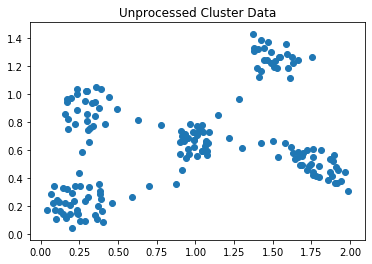

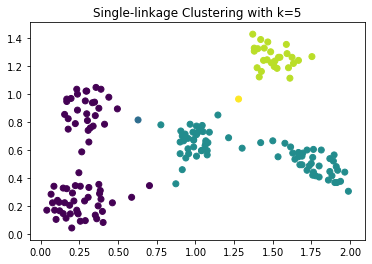

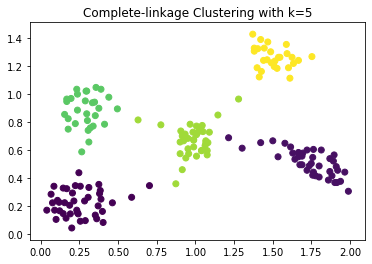

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Read the data.
data = np.loadtxt('points.txt')

# Show unprocessed data set.
fig_cluster = plt.figure()
plt.scatter(data[:, 0], data[:, 1])
plt.title('Unprocessed Cluster Data')
fig_cluster.canvas.draw()

# Apply Single Linkage Clustering
labels = linkage(data, k=5, complete=False)
fig_single = plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.title('Single-linkage Clustering with k=5')
fig_single.canvas.draw()

print(np.unique(labels))

# Apply Complete Linkage Clustering
labels = linkage(data, k=5, complete=True)
fig_complete = plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.title('Complete-linkage Clustering with k=5')
fig_complete.canvas.draw()

# Test different parameters above
# YOUR CODE HERE

What is the difference between single- and complete-linkage clustering and which is the better solution given the dataset?

YOUR ANSWER HERE

## Assignment 3: k-means Clustering [9 Points]

### a) Implement k-means clustering. Plot the results for $k = 7$ and $k = 3$ in colorful scatter plots.

How could one handle situations when one or more clusters end up containing 0 elements?

In [61]:
MAX_ITERATIONS = 5000

def kmeans(data, k=3):
    """
    Applies kmeans clustering to the data using k initial clusters.
    data is expected to be a numpy array of size n*2, 
    n being the amount of observations in the data. This function returns
    the centroids and the labels for the clusters data (1,1,3,5,5,5,...)
    """

    centroids = data[np.random.choice(data.shape[0], k)] 
    prev_centroids = None
    i = 0

    while i < MAX_ITERATIONS and not np.array_equal(centroids, prev_centroids):

        prev_centroids = np.copy(centroids)
        # for each element in the dataset, set the closest centroid as label
        labels = np.argmin(cdist(centroids, data), axis=0)

        for cluster in range(k):

            # cluster not empty
            if cluster in labels:
                # update centroid for cluster (new mean)
                centroid = np.mean([data[i] for i in range(len(data)) if labels[i] == cluster], axis=0)
                centroids[cluster] = centroid
            else:
                pass
                # cluster empty - there are several extensions of the basic k-means
                # algorithm which follow different strategies for empty clusters
        i += 1

    return labels, centroids

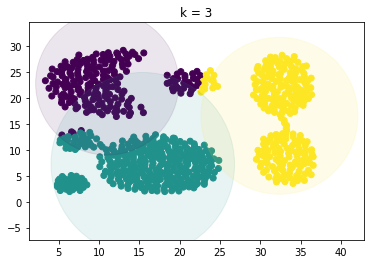

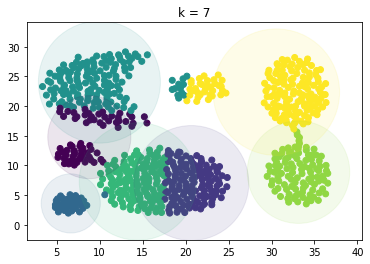

In [66]:
data = np.loadtxt('clusterData.txt')


# Test different ks here
# YOUR CODE HERE
for k in [3, 7]:
    labels, centroids = kmeans(data, k)

    kmeans_fig = plt.figure('k-means with k={}'.format(k))
    plt.scatter(data[:,0], data[:,1], c=labels)
    plt.scatter(centroids[:,0], centroids[:,1], 
                c=list(set(labels)), alpha=.1, marker='o',
                s=np.array([len(labels[labels==label]) for label in set(labels)])*100)
    plt.title('k = '+str(k))
    kmeans_fig.canvas.draw()
    

### b) Why might the clustering for k=7 not look optimal? 

Because the seven clusters are not clearly separated from one another.